In [1]:
# Read in existing demo

import pickle

olddemo = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/demographics.pkl', 'rb'))

print('Done')

Done


In [2]:
newdemo = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2/demographics.pkl', 'rb'))

print('Done')

Done


In [3]:
print(list(olddemo.keys()))

['f_21003_2_0', 'f_31_0_0', 'f_46_0_0', 'f_46_0_0_adj', 'f_47_0_0', 'f_47_0_0_adj', 'f_48_0_0', 'f_48_0_0_adj', 'f_49_0_0', 'f_49_0_0_adj', 'f_50_0_0', 'f_50_0_0_adj', 'f_93_0_0', 'f_93_0_0_adj', 'f_94_0_0', 'f_94_0_0_adj', 'f_95_0_0', 'f_95_0_0_adj', 'f_102_0_0', 'f_102_0_0_adj', 'f_134_0_0', 'f_134_0_0_adj', 'f_135_0_0', 'f_135_0_0_adj', 'f_136_0_0', 'f_136_0_0_adj', 'f_137_0_0', 'f_137_0_0_adj', 'f_738_0_0', 'f_738_0_0_adj', 'f_864_0_0', 'f_864_0_0_adj', 'f_874_0_0', 'f_874_0_0_adj', 'f_884_0_0', 'f_884_0_0_adj', 'f_894_0_0', 'f_894_0_0_adj', 'f_904_0_0', 'f_904_0_0_adj', 'f_914_0_0', 'f_914_0_0_adj', 'f_924_0_0', 'f_924_0_0_adj', 'f_943_0_0', 'f_943_0_0_adj', 'f_971_0_0', 'f_971_0_0_adj', 'f_981_0_0', 'f_981_0_0_adj', 'f_991_0_0', 'f_991_0_0_adj', 'f_1001_0_0', 'f_1001_0_0_adj', 'f_1011_0_0', 'f_1011_0_0_adj', 'f_1021_0_0', 'f_1021_0_0_adj', 'f_1050_0_0', 'f_1050_0_0_adj', 'f_1060_0_0', 'f_1060_0_0_adj', 'f_1070_0_0', 'f_1070_0_0_adj', 'f_1080_0_0', 'f_1080_0_0_adj', 'f_1090_0_0', 

In [4]:
for sub,val in olddemo['f_50_0_0'].items():
    print(val)
    break

176.5


In [5]:
# Correlates and lifestyle factors
# Age and sex first
# Some fields like tobacco use are categorical but might be better coded as continuous
# PRS AD is in UKB2 while all other fields are in UKB3

import os

desc = ['Age', 'Sex', 'Waist Circumference', 'Height', 
        'Pulse Rate', 'Days Vigorous Physical Activity',
        'Time Spent Outdoors Summer', 'Time Spent Outdoors Winter', 'Time Spent Watching TV', 'Sleep Duration',
        'Nap During Day', 'Daytime Drowsiness', 'Current tobacco use', 'Past Tobacco Use',
        'Overall Health Rating', 'Diabetes', 
        'Diastolic BP', 'Systolic BP',
        'BMI', 'Basal Metabolic Rate', 'Body Impedance', 'RBC Count',
        'Hemoglobin Concentration', 'Apolipoprotein A', 'Cholesterol',
        'PRS AD', 'Alcohol Consumption', 'Hand Grip Strength (right)'
       ]
fields = ['f_21003_2_0', 'f_31_0_0', 'f_48_0_0', 'f_50_0_0', 
          'f_102_0_0', 'f_904_0_0', 
          'f_1050_0_0', 'f_1060_0_0', 'f_1070_0_0', 'f_1160_0_0',
          'f_1190_0_0', 'f_1220_0_0', 'f_1239_0_0', 'f_1249_0_0',
          'f_2178_0_0', 'f_2443_0_0', 
          'f_4079_0_0', 'f_4080_0_0', 
          'f_21001_0_0', 'f_23105_0_0', 'f_23106_0_0', 'f_30010_0_0',
          'f_30020_0_0', 'f_30630_0_0', 'f_30690_0_0', 
          '26206-0.0', 'f_1558_0_0', 'f_46_0_0'
         ]
types = ['continuous', 'categorical', 'continuous', 'continuous',
         'continuous', 'continuous', 
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'categorical', 
         'continuous', 'continuous',
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous'
        ]

init = True
inter_subs = set()

for field in fields:
    if field == '26206-0.0':
        subs = set(newdemo[field].keys())
    else:
        subs = set(olddemo[field].keys())
    if init:
        init = False
        inter_subs = subs
    else:
        inter_subs = inter_subs.intersection(subs)
        
print(len(inter_subs))

inter_subs_fc = set()

for sub in inter_subs:
    if os.path.isfile(f'/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/conn/{sub}_task-20227-2_fc.npy'):
        inter_subs_fc.add(sub)

print(len(inter_subs_fc))

29466
29466


In [6]:
# Save subs for getting their FC later

pickle.dump(inter_subs_fc, open('/home/anton/Documents/Yale/UKB/inter_subs_fc.pkl', 'wb'))

print('Done')

Done


In [7]:
import sys

sys.path.append('/home/anton/Documents/Tulane/Research/demo-vae/pip/src/')

from demovae import DemoVAE

In [8]:
import numpy as np

fcs = []
demos = [[] for field in fields]
count = 0

for sub in inter_subs_fc:
    count += 1
    for i in range(len(fields)):
        if i == 25:
            val = newdemo[fields[i]][sub]
        else:
            val = olddemo[fields[i]][sub]
        demos[i].append(val)
    p = np.load(f'/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/conn/{sub}_task-20227-2_fc.npy')
    fcs.append(p)
    if count % 1000 == 0:
        print(f'Done {count}')
    if count == 700:
        break

fcs = np.stack(fcs)
demos = [np.array(demo) for demo in demos]

# for i in range(len(types)):
#     if types[i] == 'continuous':
#         demos[i] = (demos[i]-np.mean(demos[i]))/np.std(demos[i])

print('Done')

Done


In [9]:
for i in range(len(types)):
    print(i, desc[i])

0 Age
1 Sex
2 Waist Circumference
3 Height
4 Pulse Rate
5 Days Vigorous Physical Activity
6 Time Spent Outdoors Summer
7 Time Spent Outdoors Winter
8 Time Spent Watching TV
9 Sleep Duration
10 Nap During Day
11 Daytime Drowsiness
12 Current tobacco use
13 Past Tobacco Use
14 Overall Health Rating
15 Diabetes
16 Diastolic BP
17 Systolic BP
18 BMI
19 Basal Metabolic Rate
20 Body Impedance
21 RBC Count
22 Hemoglobin Concentration
23 Apolipoprotein A
24 Cholesterol
25 PRS AD
26 Alcohol Consumption
27 Hand Grip Strength (right)


In [10]:
# Get statistics for demo fields

# demos[7][demos[7] < 0] = 0
didx = 26

print(np.mean(demos[didx]), np.std(demos[didx]))
# print(np.sum(demos[didx] == 1)/700, np.sum(demos[didx] != 1)/700)

2.6228571428571428 1.3290352492983588


In [20]:
# Choose demographic fields
# Since the model is unstable with more than about 5
# Keep age, sex, waist, and height in all demos and just vary the last one

nums = [0,1,2,3]
special_demo = fields[nums[-1]]

reduced_demos = [demos[i] for i in nums]
reduced_types = [types[i] for i in nums]

print(len(reduced_demos))
print(special_demo)

4
f_50_0_0


In [21]:
vae = DemoVAE(pperiod=50, use_cuda=True, nepochs=10000, latent_dim=100, weight_decay=0, lr=5e-5, loss_rec_mult=1e3,
              loss_pred_mult=0.01, loss_C_mult=1e4)
vae.fit(fcs, reduced_demos, reduced_types)

Fitting auxilliary guidance model for demographic 0 continuous... done
 doneng auxilliary guidance model for demographic 1 categorical...
 doneng auxilliary guidance model for demographic 2 continuous...
 doneng auxilliary guidance model for demographic 3 continuous...
Converting input to pytorch
Converting demographics to pytorch
Beginning VAE training
Epoch 0 ReconLoss 4.8057 CovarianceLoss 69.5319 MeanLoss 0.085 DecorLoss 4.4991 GuidanceTargets [66.67636108398438, 0, 1, 97.44422912597656, 178.25238037109375] GuidanceLosses ['29.6151', '145.0356', '145.0356', '21.6217', '24.7164'] 
Epoch 50 ReconLoss 0.4027 CovarianceLoss 68.7867 MeanLoss 0.1018 DecorLoss 2.6633 GuidanceTargets [67.29673767089844, 0, 1, 100.31242370605469, 176.20179748535156] GuidanceLosses ['5.5178', '0.0', '0.0', '7.9064', '8.9939'] 
Epoch 100 ReconLoss 0.2589 CovarianceLoss 66.8924 MeanLoss 0.1009 DecorLoss 1.7395 GuidanceTargets [72.8927001953125, 1, 0, 76.05442810058594, 178.2296600341797] GuidanceLosses ['3.236

DemoVAE(LR_C=100, alpha=100, bsize=1000, latent_dim=100, loss_C_mult=10000.0,
        loss_decor_mult=10, loss_mu_mult=1, loss_pred_mult=0.01,
        loss_rec_mult=1000.0, lr=5e-05, nepochs=10000, pperiod=50,
        use_cuda=True, weight_decay=0)

In [22]:
# Selected: 700 subs latent_dim=120 nepochs=10000 C_mult=1e4 recon 0.1416
# Selected: 1000 subs latent_dim=150 nepochs=12000 C_mult=5e3 recon 0.1449 age sex waist height + 1 more field
# Bad: 1000 subs latent_dim=150 nepochs=12000 C_mult=1e4 recon one more demo field
# Bad: 1500 subs latent_dim=150 nepochs=12000 C_mult=1e4 recon 0.146 0.1625 Bad Covar
# Best: 1000 subs latent_dim=150 nepochs=12000 C_mult=5e3 recon 0.144
# Okay: 700 subs latent_dim=100 nepochs=12000 recon 0.15
# Best: 500 subs latent_dim=100 nepochs=12000
# Best: 300 subs latent_dim=50 nepochs=6000 

synth = vae.transform(len(fcs), reduced_demos, reduced_types)

In [23]:
from sklearn.linear_model import Ridge, LogisticRegression

def rmse(a, b):
    return np.mean((a-b)**2)**0.5
    
y = reduced_demos[0]

reg = Ridge(alpha=100).fit(synth, y)
yhat = reg.predict(fcs)

print(rmse(np.mean(y), y))
print(rmse(yhat, y))

y = reduced_demos[1]

reg = LogisticRegression(C=100).fit(synth, y)
yhat = reg.predict(fcs)

print(np.mean(y))
print(np.mean(yhat == y))

y = reduced_demos[2]

reg = Ridge(alpha=100).fit(synth, y)
yhat = reg.predict(fcs)

print(rmse(np.mean(y), y))
print(rmse(yhat, y))

7.695241572370738
3.8533671721078444
0.49857142857142855
0.96
12.370430375434372
6.319941077078373


In [24]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_480233/322951098.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


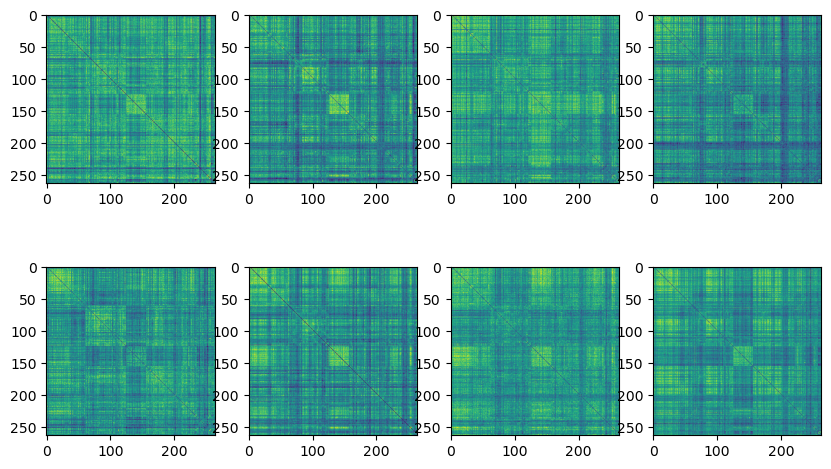

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10,6))

for i in range(2):
    for j in range(4):
        ax[i,j].imshow(vec2mat(synth[i*4+j]))

fig.show()

In [44]:
reduced_demos[2][:20]

array([ 71.,  99.,  81., 110.,  77.,  75., 107.,  79.,  91.,  86.,  90.,
        78.,  97., 100.,  82.,  70.,  83.,  85.,  77., 105.])

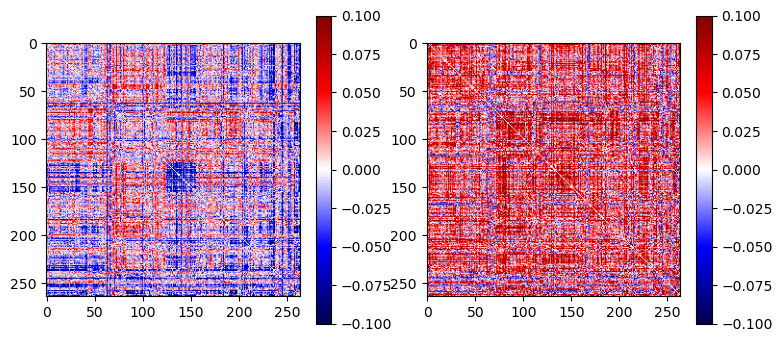

In [46]:
real_grp1 = []
real_grp2 = []
synth_grp1 = []
synth_grp2 = []

for i in range(len(fcs)):
    a = reduced_demos[2][i]
    if a < 80:
        real_grp1.append(fcs[i])
        synth_grp1.append(synth[i])
    elif a > 100:
        real_grp2.append(fcs[i])
        synth_grp2.append(synth[i])

real_grp1 = np.stack(real_grp1)
real_grp2 = np.stack(real_grp2)
synth_grp1 = np.stack(synth_grp1)
synth_grp2 = np.stack(synth_grp2)

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def getlabel(i):
    for j in range(len(divis)):
        if i >= divis[j] and i < divis[j+1]:
            return labels[j]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

real_diff = np.mean(real_grp2, axis=0)-np.mean(real_grp1, axis=0)
real_diff = vec2mat(real_diff)

synth_diff = np.mean(synth_grp2, axis=0)-np.mean(synth_grp1, axis=0)
synth_diff = vec2mat(synth_diff)

norm = TwoSlopeNorm(vmax=0.1, vmin=-0.1, vcenter=0)

fig, ax = plt.subplots(1,2,figsize=(9,4))

pos = ax[0].imshow(real_diff, cmap='seismic', norm=norm)
fig.colorbar(pos, ax=ax[0])

pos = ax[1].imshow(synth_diff, cmap='seismic', norm=norm)
fig.colorbar(pos, ax=ax[1])

fig.show()

In [26]:
vae.save(f'/home/anton/Documents/Yale/UKB/VAE_Models/700_subs/{special_demo}.pkl')

print('Done save')

Done save


In [27]:
import pickle

pickle.dump({'demos': reduced_demos, 'types': reduced_types}, 
            open(f'/home/anton/Documents/Yale/UKB/VAE_Models/700_subs/demos_{special_demo}.pkl', 'wb'))

print('Done')
print(special_demo)

Done
f_50_0_0
